In [1]:
import os,datetime

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data = pd.read_csv('./data-sets/life_expectancy_data.csv')

data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
#checking the number of records we have in our data set.
# here we have 2938 records and 22 features (columns)
data.shape

(2938, 22)

In [4]:
#check the number of missing fileds or nan in the data set (column-wise)
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
#now we need to handle the missing values.
# here we are create the list of unique countries 
#and fill in with the mean values whose value are missing

#get the unique countries now
countries = data['Country'].unique()

#get the features list who has missing values 
na_cols = data.columns[data.isna().sum() > 0]

#country wise (per country basis)fill the missing values with mean value of the particualr column
for col in na_cols:
    for country in countries:
        data.loc[data['Country'] == country, col] = data.loc[data['Country'] == country, col]\
                                                    .fillna(data[data['Country'] == country][col].mean())

In [6]:
# check once if any this is because all of the values 
# for the particular country are missing
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                             17
percentage expenditure               0
Hepatitis B                        144
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                                0
Total expenditure                   32
Diphtheria                           0
 HIV/AIDS                            0
GDP                                405
Population                         648
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [7]:
#we will now drop the value which are missing
data = data.dropna()

data.shape

(2128, 22)

In [8]:
# lets understand the data now. check the values in the status columns
# count the number of values for a particular group
# here countries are categoriszed either into developing or developed
data['Status'].value_counts()

Developing    1824
Developed      304
Name: Status, dtype: int64

In [9]:
# lets take a look at the country column.
# get the count of records for each particular country 
data['Country'].value_counts()

Eritrea                  16
Guyana                   16
Swaziland                16
Guatemala                16
Argentina                16
Mauritius                16
Luxembourg               16
Panama                   16
Algeria                  16
China                    16
Ireland                  16
Turkey                   16
Malaysia                 16
Kazakhstan               16
France                   16
Azerbaijan               16
Mexico                   16
Chad                     16
Bangladesh               16
Philippines              16
Liberia                  16
Israel                   16
Italy                    16
Croatia                  16
Latvia                   16
South Africa             16
Guinea                   16
Gabon                    16
Syrian Arab Republic     16
Afghanistan              16
                         ..
Chile                    16
Germany                  16
Sao Tome and Principe    16
Kiribati                 16
Cambodia            

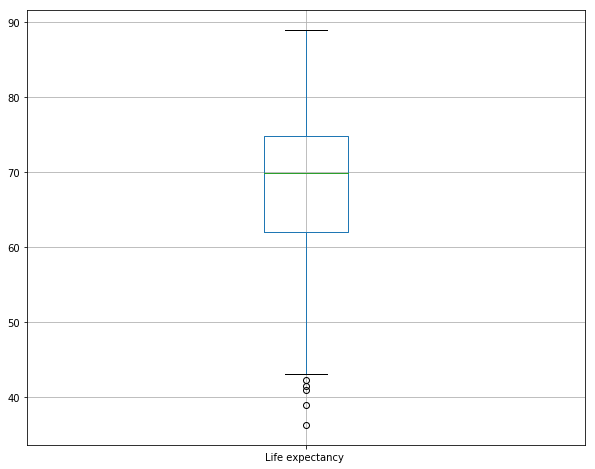

In [10]:
# now are more interested in the life expectancy varies across these countries
plt.figure(figsize = (10,8))
data.boxplot('Life expectancy ')
plt.show()

# here 70 is the median life expectancy.the box represents the interquartile range
# the lower end of the box plot are the outliners. these are the countries with low
# expectancy.
# 

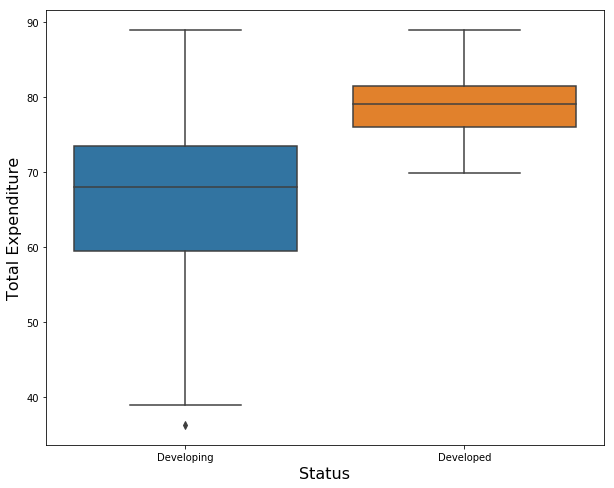

In [11]:
# we are curious about the status and life expectancy of a particular country 
plt.figure(figsize = (10,8))

sns.boxplot('Status', 'Life expectancy ', data = data)

plt.xlabel('Status', fontsize = 16)
plt.ylabel('Total Expenditure', fontsize = 16)

plt.show()

# its pretty clear that developed dountries has more life expectancy when compared
# with developing countries

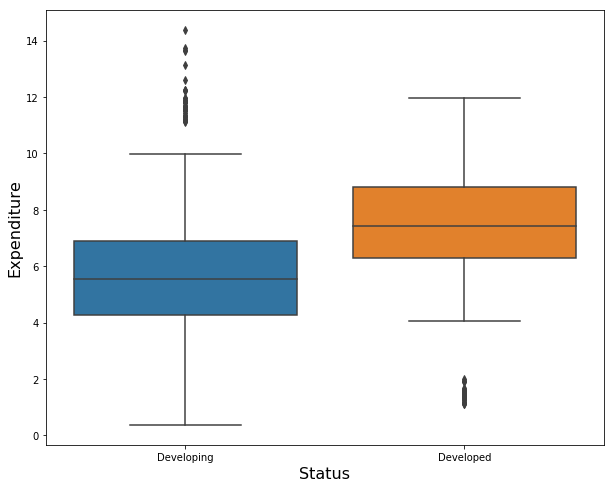

In [12]:
#we are also curios about how much the government spends on health as a percentage
plt.figure(figsize = (10,8))

sns.boxplot('Status', 'Total expenditure', data = data)

plt.xlabel('Status', fontsize = 16)
plt.ylabel('Expenditure', fontsize = 16)

plt.show()

# here the number are very much higher in the developed nations

In [13]:
# now we will check the co- relation between the certain columns which looks 
# interesting
data_corr = data[['Life expectancy ',
                  'Adult Mortality',
                  'Schooling',
                  'Total expenditure',
                  'Diphtheria ',
                  'GDP',
                  'Population']].corr()

data_corr

,Life expectancy,Adult Mortality,Schooling,Total expenditure,Diphtheria,GDP,Population
Life expectancy,1.000000,-0.662604,0.746619,0.203689,0.449975,0.445425,-0.011420
Adult Mortality,-0.662604,1.000000,-0.408661,-0.097938,-0.212157,-0.259500,-0.021050
Schooling,0.746619,-0.408661,1.000000,0.261679,0.432891,0.471767,-0.022453
Total expenditure,0.203689,-0.097938,0.261679,1.000000,0.183238,0.212498,-0.079752
Diphtheria,0.449975,-0.212157,0.432891,0.183238,1.000000,0.190957,-0.024167
GDP,0.445425,-0.259500,0.471767,0.212498,0.190957,1.000000,-0.016800
Population,-0.011420,-0.021050,-0.022453,-0.079752,-0.024167,-0.016800,1.000000


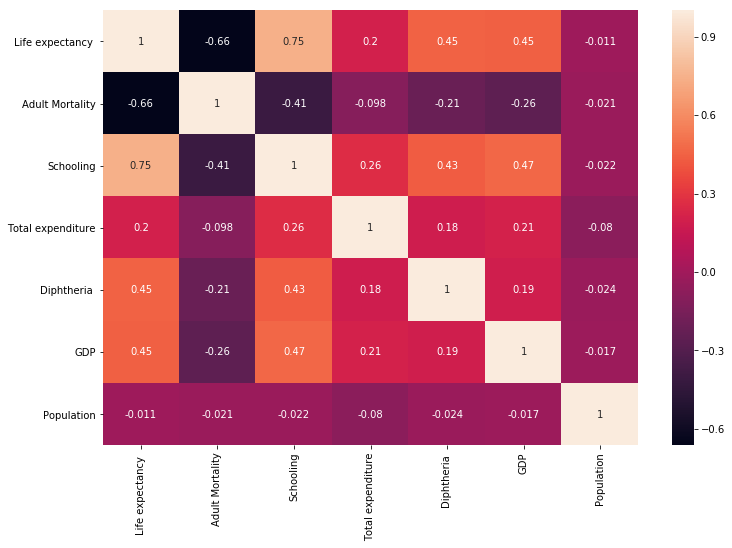

In [14]:
# lets check the co-relation between the above selected coloumns with the heatmap
fig , ax = plt.subplots(figsize = (12,8))

sns.heatmap(data_corr, annot = True)

plt.show()

In [15]:
# now we divide the data set into features and target value
# here life expectancy is the target rest all are features
features = data.drop('Life expectancy ', axis = 1)

target = data[['Life expectancy ']]
features.columns

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [16]:
target.head()

,Life expectancy
0,65.0
1,59.9
2,59.9
3,59.5
4,59.2


In [17]:
# in the given data set country column does add any value
# hence we are dropping the column
features = features.drop('Country', axis = 1)
features.columns

Index(['Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [18]:
# lets now extract the categoriacal values of the data set
# in our data set we have only the status as the categorical value 
# hence we convert the categorical value to numberical value
categorical_features = features['Status'].copy()

categorical_features.head()

0    Developing
1    Developing
2    Developing
3    Developing
4    Developing
Name: Status, dtype: object

In [19]:
# using one hot encoding will conver the categorical data into numerical data
categorical_features = pd.get_dummies(categorical_features)
categorical_features.head()

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [20]:
# now we will drop satus column as it is converted to numerical value
numeric_features = features.drop(['Status'], axis = 1)
numeric_features.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [21]:
# get the quick statistics about the numercial data
numeric_features.describe().T

# if you look at the mean and standard deviation have very different values
# machine learning model especially neural networks tend to be far more robust
# when they are trained using numeric features that has the same scale.
# The way we achieve this in machine learning is processing the numeric 
# features using a technique called standardisation.The standardisation technique
# is performed using standard scaler in scikit learn. standardisation is a column 
# wise operation where for every value in a column we substract mean and divide 
# by the standard deviation.This expresses all of our data in terms of standard
# deviation or Z-scores. Here we use the standard scaler 

,count,mean,std,min,25%,50%,75%,max
Year,2128.0,2.007500e+03,4.610856e+00,2000.00000,2003.750000,2.007500e+03,2.011250e+03,2.015000e+03
Adult Mortality,2128.0,1.743003e+02,1.297593e+02,1.00000,76.000000,1.520000e+02,2.412500e+02,7.230000e+02
infant deaths,2128.0,3.590273e+01,1.362247e+02,0.00000,1.000000,4.000000e+00,2.400000e+01,1.800000e+03
Alcohol,2128.0,4.436893e+00,3.962858e+00,0.01000,0.827500,3.735000e+00,7.162500e+00,1.787000e+01
percentage expenditure,2128.0,6.400720e+02,1.710799e+03,0.00000,19.883256,8.367799e+01,4.313651e+02,1.896135e+04
Hepatitis B,2128.0,7.727206e+01,2.526004e+01,2.00000,68.000000,8.700000e+01,9.500000e+01,9.900000e+01
Measles,2128.0,2.657467e+03,1.191224e+04,0.00000,0.000000,2.000000e+01,4.592500e+02,2.121830e+05
BMI,2128.0,3.669196e+01,1.984373e+01,1.40000,18.400000,3.885000e+01,5.520000e+01,7.760000e+01
under-five deaths,2128.0,4.981720e+01,1.851527e+02,0.00000,1.000000,4.000000e+00,3.425000e+01,2.500000e+03
Polio,2128.0,8.057201e+01,2.417005e+01,3.00000,75.000000,9.100000e+01,9.600000e+01,9.900000e+01


In [22]:
standardScaler = StandardScaler()

numeric_features = pd.DataFrame(standardScaler.fit_transform(numeric_features),
                                columns = numeric_features.columns,
                                index = numeric_features.index)

numeric_features.describe().T
# now we can see that mean value is very close to zero and the standard deviation is very close 
# to one

,count,mean,std,min,25%,50%,75%,max
Year,2128.0,-3.130328e-19,1.000235,-1.626978,-0.813489,0.000000,0.813489,1.626978
Adult Mortality,2128.0,5.425902e-18,1.000235,-1.335866,-0.757737,-0.171899,0.516075,4.229591
infant deaths,2128.0,-2.626737e-16,1.000235,-0.263617,-0.256275,-0.234247,-0.087396,12.952948
Alcohol,2128.0,6.365000e-17,1.000235,-1.117358,-0.911020,-0.177159,0.687950,3.390549
percentage expenditure,2128.0,-1.915239e-16,1.000235,-0.374224,-0.362599,-0.325301,-0.122022,10.711711
Hepatitis B,2128.0,7.943207e-18,1.000235,-2.980588,-0.367151,0.385202,0.701983,0.860373
Measles,2128.0,3.124067e-16,1.000235,-0.223140,-0.223140,-0.221460,-0.184578,17.593236
BMI,2128.0,6.662382e-17,1.000235,-1.778912,-0.922017,0.108777,0.932909,2.061994
under-five deaths,2128.0,-1.316107e-16,1.000235,-0.269123,-0.263721,-0.247514,-0.084097,13.236418
Polio,2128.0,-2.178969e-16,1.000235,-3.210181,-0.230588,0.431544,0.638460,0.762610


In [23]:
# now the preprocessing of the data set is done lets now combine the numerical feature and the categorical features
processed_features = pd.concat([numeric_features, categorical_features], axis = 1, sort = False)

processed_features.shape

(2128, 21)

In [24]:
# now lets spilt the data into train and test. training data is 80% and rest 20% is the testing data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(processed_features,
                                                target,
                                                test_size = 0.2,
                                                random_state =1)

In [25]:
(x_train.shape, x_test.shape), (y_train.shape,y_test.shape)

(((1702, 21), (426, 21)), ((1702, 1), (426, 1)))

In [26]:
# now we are ready build out regression model using the 
# sequential api 
def build_single_layer_model():
    model = tf.keras.Sequential() # instantiate a sequential model
    
    model.add(tf.keras.layers.Dense(32, # first dense layer with 32 neurons
                                   input_shape = (x_train.shape[1],),
                                   activation = 'sigmoid'))
    
    model.add(tf.keras.layers.Dense(1)) # output layer with 1 neuron 
    
    optimizer= tf.keras.optimizers.Adam(learning_rate = 0.01)
    
    model.compile(loss = 'mse', # mean square error as the loss function
                 metrics = ['mae', 'mse'], # will track mean absolute error and the mean square error
                 optimizer = optimizer)
    
    return model

In [27]:
# now lets build a single layer model
model = build_single_layer_model()

# this gives the quick overview of the layers that exists in our model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________


In [28]:
# keras as a nice utility function to visualize the layers
tf.keras.utils.plot_model(model)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [29]:
# lets now begin the process of training the model 
num_epochs = 100

training_history = model.fit(x_train,
                             y_train,
                            epochs = num_epochs,
                            validation_split = 0.2,
                            verbose = True)

Epoch 1/100
43/43 [==============================] - 1s 10ms/step - loss: 4297.1169 - mae: 64.8303 - mse: 4297.1169 - val_loss: 3337.4092 - val_mae: 57.1845 - val_mse: 3337.4092
Epoch 2/100
43/43 [==============================] - 0s 3ms/step - loss: 2994.3439 - mae: 53.9862 - mse: 2994.3439 - val_loss: 1955.4379 - val_mae: 43.3693 - val_mse: 1955.4379
Epoch 3/100
43/43 [==============================] - 0s 4ms/step - loss: 1628.0165 - mae: 39.2806 - mse: 1628.0165 - val_loss: 952.5154 - val_mae: 29.7615 - val_mse: 952.5154
Epoch 4/100
43/43 [==============================] - 0s 3ms/step - loss: 796.1305 - mae: 26.7146 - mse: 796.1305 - val_loss: 414.3534 - val_mae: 18.7285 - val_mse: 414.3534
Epoch 5/100
43/43 [==============================] - 0s 3ms/step - loss: 331.6915 - mae: 16.3638 - mse: 331.6915 - val_loss: 179.0792 - val_mae: 11.5186 - val_mse: 179.0792
Epoch 6/100
43/43 [==============================] - 0s 3ms/step - loss: 148.4628 - mae: 10.4246 - mse: 148.4628 - val_loss:

43/43 [==============================] - 0s 3ms/step - loss: 5.9363 - mae: 1.7953 - mse: 5.9363 - val_loss: 7.6798 - val_mae: 1.9784 - val_mse: 7.6798
Epoch 51/100
43/43 [==============================] - 0s 3ms/step - loss: 5.7106 - mae: 1.7280 - mse: 5.7106 - val_loss: 7.5044 - val_mae: 1.9514 - val_mse: 7.5044
Epoch 52/100
43/43 [==============================] - 0s 3ms/step - loss: 6.4536 - mae: 1.8293 - mse: 6.4536 - val_loss: 7.5127 - val_mae: 1.9475 - val_mse: 7.5127
Epoch 53/100
43/43 [==============================] - 0s 3ms/step - loss: 5.1581 - mae: 1.6695 - mse: 5.1581 - val_loss: 7.3289 - val_mae: 1.9214 - val_mse: 7.3289
Epoch 54/100
43/43 [==============================] - 0s 3ms/step - loss: 5.8869 - mae: 1.7498 - mse: 5.8869 - val_loss: 7.4030 - val_mae: 1.9472 - val_mse: 7.4030
Epoch 55/100
43/43 [==============================] - 0s 3ms/step - loss: 6.3078 - mae: 1.7529 - mse: 6.3078 - val_loss: 7.3003 - val_mae: 1.9215 - val_mse: 7.3003
Epoch 56/100
43/43 [=========

43/43 [==============================] - 0s 3ms/step - loss: 4.3745 - mae: 1.4708 - mse: 4.3745 - val_loss: 5.9410 - val_mae: 1.6848 - val_mse: 5.9410


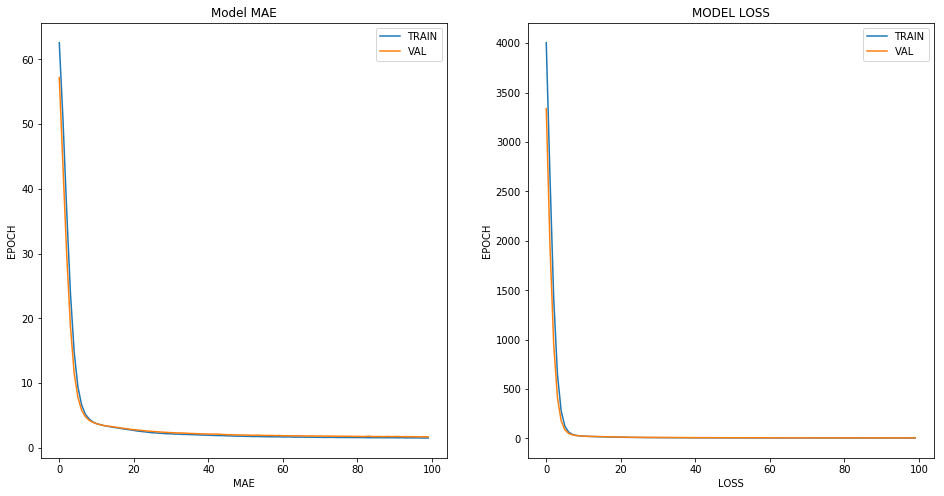

In [30]:
# lets now plot a graph for the mean absolute error change 
plt.figure(figsize = (16,8))

plt.subplot(1,2,1)

plt.plot(training_history.history['mae'])
plt.plot(training_history.history['val_mae'])

plt.title('Model MAE')
plt.xlabel('MAE')
plt.ylabel('EPOCH')
plt.legend(['TRAIN', 'VAL'])

plt.subplot(1,2,2)

plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])

plt.title('MODEL LOSS')
plt.xlabel('LOSS')
plt.ylabel('EPOCH')
plt.legend(['TRAIN','VAL'])

In [31]:
# we can now high level api evaluate to compute the same matrix
model.evaluate(x_test,y_test)

14/14 [==============================] - 0s 2ms/step - loss: 5.8335 - mae: 1.7475 - mse: 5.8335


[5.833510398864746, 1.7474530935287476, 5.833510398864746]

In [32]:
# now lets use the train model to predict the test data
y_pred = model.predict(x_test)

r2_score(y_test, y_pred)

0.9353755037981905

In [33]:
# now we are setting up of dataframe here having the actual life extectancy 
# from our test data vs predicted values from our model
pred_results = pd.DataFrame({'y_test': y_test.values.flatten(),
                            'y_pred': y_pred.flatten()}, index = range(len(y_pred)))

In [34]:
pred_results.sample(10)

,y_test,y_pred
56,44.8,44.012562
318,72.5,72.223236
287,48.4,49.120289
338,69.6,69.821297
118,71.6,72.752220
358,68.0,63.332859
229,49.0,45.001163
3,75.4,75.566093
128,52.8,55.226082
187,65.3,68.166580


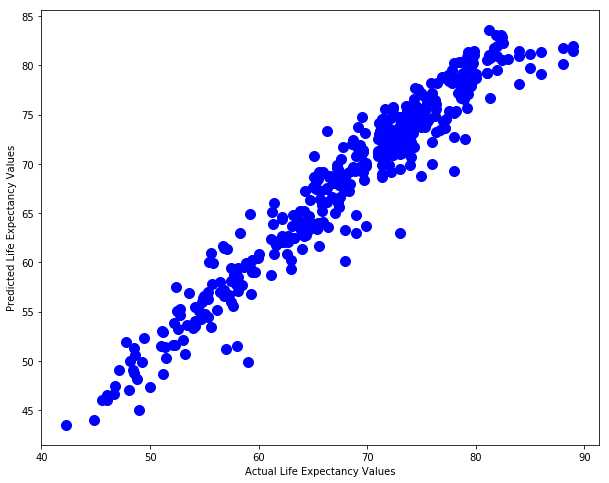

In [35]:
# now this is quick overview how out models are performing by plotting 
# scatter plot 
plt.figure(figsize = (10,8))

plt.scatter(y_test, y_pred, s = 100, c = 'blue')

plt.xlabel('Actual Life Expectancy Values')
plt.ylabel('Predicted Life Expectancy Values')

plt.show()

In [36]:
# now we will build the mutiple layers model 
def build_multi_layer_model():
    model = keras.Sequential([layers.Dense(32, input_shape = (x_train.shape[1],), activation = 'relu'),
                                      layers.Dense(16, activation = 'relu'),
                                      layers.Dense(4, activation = 'relu'),
                                      layers.Dense(1)])
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
    
    model.compile(loss = 'mse', metrics = ['mae','mse'], optimizer = optimizer)
    
    return model


In [37]:
model = build_multi_layer_model()

tf.keras.utils.plot_model(model, show_shapes = 'True')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [38]:
# now we want to visualize the training process using tensor board so we need 
# to get rid of sequence_logs under my current working folder and write out
# new logs
#!rm -rf seq_logs

#!ls -l

In [39]:
# setup your log directory to sequence_logs and instantiate a tensorboard
# call back.A callback in tensorflow is a function that can be used to
# cutsomize the behavior of the model during training, evaluation and prediction
# keras.callbacks.TensorBoard logs out the tensorboard events the training processes
# allowing us to visualize the details of out neural network graph
# and how the weights and biases are converge to their final values
logdir = os.path.join ("seq_logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

tensorboard_callback = keras.callbacks.TensorBoard(logdir, histogram_freq = 1)

In [40]:
# now lets start the training process

training_history = model.fit(x_train,
                            y_train,
                            validation_split = 0.2,
                            epochs = 500,
                            batch_size = 100,
                            callbacks = [tensorboard_callback])

Epoch 1/500
14/14 [==============================] - 1s 91ms/step - loss: 4530.1952 - mae: 66.5801 - mse: 4530.1953 - val_loss: 3152.1528 - val_mae: 55.3020 - val_mse: 3152.1528
Epoch 2/500
14/14 [==============================] - 0s 5ms/step - loss: 2205.2287 - mae: 44.1742 - mse: 2205.2287 - val_loss: 590.9453 - val_mae: 17.6110 - val_mse: 590.9453
Epoch 3/500
14/14 [==============================] - 0s 6ms/step - loss: 435.4580 - mae: 15.8093 - mse: 435.4580 - val_loss: 181.7458 - val_mae: 10.9403 - val_mse: 181.7458
Epoch 4/500
14/14 [==============================] - 0s 5ms/step - loss: 179.9236 - mae: 10.7902 - mse: 179.9236 - val_loss: 115.5285 - val_mae: 8.6113 - val_mse: 115.5285
Epoch 5/500
14/14 [==============================] - 0s 5ms/step - loss: 94.3642 - mae: 7.6233 - mse: 94.3642 - val_loss: 76.0539 - val_mae: 6.8822 - val_mse: 76.0539
Epoch 6/500
14/14 [==============================] - 0s 5ms/step - loss: 68.9200 - mae: 6.3663 - mse: 68.9200 - val_loss: 64.1658 - val

14/14 [==============================] - 0s 5ms/step - loss: 6.9098 - mae: 1.9349 - mse: 6.9098 - val_loss: 8.6651 - val_mae: 2.1113 - val_mse: 8.6651
Epoch 51/500
14/14 [==============================] - 0s 5ms/step - loss: 7.2763 - mae: 1.9997 - mse: 7.2763 - val_loss: 8.2961 - val_mae: 2.0108 - val_mse: 8.2961
Epoch 52/500
14/14 [==============================] - 0s 5ms/step - loss: 6.6089 - mae: 1.9034 - mse: 6.6089 - val_loss: 8.4251 - val_mae: 2.1098 - val_mse: 8.4251
Epoch 53/500
14/14 [==============================] - 0s 5ms/step - loss: 6.7351 - mae: 1.9100 - mse: 6.7351 - val_loss: 8.1956 - val_mae: 2.0188 - val_mse: 8.1956
Epoch 54/500
14/14 [==============================] - 0s 6ms/step - loss: 7.0360 - mae: 1.9341 - mse: 7.0360 - val_loss: 8.2942 - val_mae: 2.0244 - val_mse: 8.2942
Epoch 55/500
14/14 [==============================] - 0s 5ms/step - loss: 6.6205 - mae: 1.9072 - mse: 6.6205 - val_loss: 8.0710 - val_mae: 2.0023 - val_mse: 8.0710
Epoch 56/500
14/14 [=========

14/14 [==============================] - 0s 5ms/step - loss: 5.9285 - mae: 1.8041 - mse: 5.9285 - val_loss: 7.0284 - val_mae: 1.7776 - val_mse: 7.0284
Epoch 101/500
14/14 [==============================] - 0s 9ms/step - loss: 5.4000 - mae: 1.7014 - mse: 5.4000 - val_loss: 7.4212 - val_mae: 1.9114 - val_mse: 7.4212
Epoch 102/500
14/14 [==============================] - 0s 5ms/step - loss: 4.9952 - mae: 1.6564 - mse: 4.9952 - val_loss: 7.5841 - val_mae: 1.9552 - val_mse: 7.5841
Epoch 103/500
14/14 [==============================] - 0s 5ms/step - loss: 5.5773 - mae: 1.7751 - mse: 5.5773 - val_loss: 6.7083 - val_mae: 1.8204 - val_mse: 6.7083
Epoch 104/500
14/14 [==============================] - 0s 5ms/step - loss: 4.6626 - mae: 1.5587 - mse: 4.6626 - val_loss: 6.7614 - val_mae: 1.7800 - val_mse: 6.7614
Epoch 105/500
14/14 [==============================] - 0s 6ms/step - loss: 4.9587 - mae: 1.6487 - mse: 4.9587 - val_loss: 7.3840 - val_mae: 1.9107 - val_mse: 7.3840
Epoch 106/500
14/14 [===

Epoch 150/500
14/14 [==============================] - 0s 7ms/step - loss: 4.1882 - mae: 1.4962 - mse: 4.1882 - val_loss: 7.0010 - val_mae: 1.7964 - val_mse: 7.0010
Epoch 151/500
14/14 [==============================] - 0s 5ms/step - loss: 4.5637 - mae: 1.5155 - mse: 4.5637 - val_loss: 6.9828 - val_mae: 1.7872 - val_mse: 6.9828
Epoch 152/500
14/14 [==============================] - 0s 5ms/step - loss: 4.5468 - mae: 1.5570 - mse: 4.5468 - val_loss: 6.5552 - val_mae: 1.7368 - val_mse: 6.5552
Epoch 153/500
14/14 [==============================] - 0s 10ms/step - loss: 4.6292 - mae: 1.5914 - mse: 4.6292 - val_loss: 7.4063 - val_mae: 1.8784 - val_mse: 7.4063
Epoch 154/500
14/14 [==============================] - 0s 5ms/step - loss: 5.0676 - mae: 1.6732 - mse: 5.0676 - val_loss: 8.2941 - val_mae: 2.0154 - val_mse: 8.2941
Epoch 155/500
14/14 [==============================] - 0s 5ms/step - loss: 4.5302 - mae: 1.5892 - mse: 4.5302 - val_loss: 7.0473 - val_mae: 1.8996 - val_mse: 7.0473
Epoch 156

Epoch 200/500
14/14 [==============================] - 0s 5ms/step - loss: 4.6809 - mae: 1.5871 - mse: 4.6809 - val_loss: 7.5470 - val_mae: 1.8236 - val_mse: 7.5470
Epoch 201/500
14/14 [==============================] - 0s 7ms/step - loss: 4.1316 - mae: 1.4747 - mse: 4.1316 - val_loss: 7.7275 - val_mae: 1.9062 - val_mse: 7.7275
Epoch 202/500
14/14 [==============================] - 0s 5ms/step - loss: 4.0605 - mae: 1.4991 - mse: 4.0605 - val_loss: 7.1636 - val_mae: 1.8789 - val_mse: 7.1636
Epoch 203/500
14/14 [==============================] - 0s 5ms/step - loss: 3.9574 - mae: 1.4352 - mse: 3.9574 - val_loss: 7.2104 - val_mae: 1.8504 - val_mse: 7.2104
Epoch 204/500
14/14 [==============================] - 0s 5ms/step - loss: 4.3725 - mae: 1.5269 - mse: 4.3725 - val_loss: 7.6247 - val_mae: 1.8592 - val_mse: 7.6247
Epoch 205/500
14/14 [==============================] - 0s 5ms/step - loss: 3.9619 - mae: 1.4328 - mse: 3.9619 - val_loss: 6.9939 - val_mae: 1.7917 - val_mse: 6.9939
Epoch 206/

Epoch 250/500
14/14 [==============================] - 0s 8ms/step - loss: 3.8091 - mae: 1.4467 - mse: 3.8091 - val_loss: 7.8365 - val_mae: 1.9675 - val_mse: 7.8365
Epoch 251/500
14/14 [==============================] - 0s 6ms/step - loss: 3.6746 - mae: 1.3960 - mse: 3.6746 - val_loss: 7.4035 - val_mae: 1.8310 - val_mse: 7.4035
Epoch 252/500
14/14 [==============================] - 0s 5ms/step - loss: 3.3517 - mae: 1.3546 - mse: 3.3517 - val_loss: 7.3662 - val_mae: 1.7909 - val_mse: 7.3662
Epoch 253/500
14/14 [==============================] - 0s 5ms/step - loss: 3.5481 - mae: 1.3395 - mse: 3.5481 - val_loss: 7.0781 - val_mae: 1.7807 - val_mse: 7.0781
Epoch 254/500
14/14 [==============================] - 0s 5ms/step - loss: 3.3104 - mae: 1.3239 - mse: 3.3104 - val_loss: 7.0275 - val_mae: 1.7644 - val_mse: 7.0275
Epoch 255/500
14/14 [==============================] - 0s 5ms/step - loss: 3.4456 - mae: 1.3287 - mse: 3.4456 - val_loss: 7.3314 - val_mae: 1.7881 - val_mse: 7.3314
Epoch 256/

Epoch 300/500
14/14 [==============================] - 0s 5ms/step - loss: 3.1948 - mae: 1.2920 - mse: 3.1948 - val_loss: 7.4842 - val_mae: 1.8215 - val_mse: 7.4842
Epoch 301/500
14/14 [==============================] - 0s 6ms/step - loss: 3.2004 - mae: 1.3618 - mse: 3.2004 - val_loss: 7.2499 - val_mae: 1.7869 - val_mse: 7.2499
Epoch 302/500
14/14 [==============================] - 0s 5ms/step - loss: 3.8118 - mae: 1.4291 - mse: 3.8118 - val_loss: 7.4683 - val_mae: 1.8589 - val_mse: 7.4683
Epoch 303/500
14/14 [==============================] - 0s 5ms/step - loss: 3.5349 - mae: 1.4028 - mse: 3.5349 - val_loss: 7.6624 - val_mae: 1.8464 - val_mse: 7.6624
Epoch 304/500
14/14 [==============================] - 0s 5ms/step - loss: 3.5504 - mae: 1.3476 - mse: 3.5504 - val_loss: 7.2353 - val_mae: 1.7866 - val_mse: 7.2353
Epoch 305/500
14/14 [==============================] - 0s 5ms/step - loss: 3.1950 - mae: 1.2871 - mse: 3.1950 - val_loss: 8.2160 - val_mae: 2.0092 - val_mse: 8.2160
Epoch 306/

Epoch 350/500
14/14 [==============================] - 0s 6ms/step - loss: 4.7327 - mae: 1.6633 - mse: 4.7327 - val_loss: 9.6655 - val_mae: 2.2790 - val_mse: 9.6655
Epoch 351/500
14/14 [==============================] - 0s 6ms/step - loss: 4.0949 - mae: 1.5208 - mse: 4.0949 - val_loss: 8.4530 - val_mae: 2.0038 - val_mse: 8.4530
Epoch 352/500
14/14 [==============================] - 0s 6ms/step - loss: 3.5517 - mae: 1.3871 - mse: 3.5517 - val_loss: 8.1128 - val_mae: 1.9660 - val_mse: 8.1128
Epoch 353/500
14/14 [==============================] - 0s 5ms/step - loss: 3.5027 - mae: 1.3829 - mse: 3.5027 - val_loss: 8.0936 - val_mae: 1.9201 - val_mse: 8.0936
Epoch 354/500
14/14 [==============================] - 0s 5ms/step - loss: 3.7252 - mae: 1.4442 - mse: 3.7252 - val_loss: 7.3770 - val_mae: 1.8489 - val_mse: 7.3770
Epoch 355/500
14/14 [==============================] - 0s 6ms/step - loss: 3.0552 - mae: 1.2816 - mse: 3.0552 - val_loss: 7.2011 - val_mae: 1.8176 - val_mse: 7.2011
Epoch 356/

Epoch 400/500
14/14 [==============================] - 0s 5ms/step - loss: 3.6701 - mae: 1.4486 - mse: 3.6701 - val_loss: 7.4626 - val_mae: 1.8684 - val_mse: 7.4626
Epoch 401/500
14/14 [==============================] - 0s 5ms/step - loss: 2.8696 - mae: 1.2521 - mse: 2.8696 - val_loss: 7.6096 - val_mae: 1.8936 - val_mse: 7.6096
Epoch 402/500
14/14 [==============================] - 0s 5ms/step - loss: 3.5446 - mae: 1.3722 - mse: 3.5446 - val_loss: 8.1248 - val_mae: 2.0286 - val_mse: 8.1248
Epoch 403/500
14/14 [==============================] - 0s 5ms/step - loss: 3.6673 - mae: 1.4595 - mse: 3.6673 - val_loss: 7.3278 - val_mae: 1.8263 - val_mse: 7.3278
Epoch 404/500
14/14 [==============================] - 0s 5ms/step - loss: 3.4927 - mae: 1.4141 - mse: 3.4927 - val_loss: 9.3994 - val_mae: 2.3797 - val_mse: 9.3994
Epoch 405/500
14/14 [==============================] - 0s 4ms/step - loss: 3.4988 - mae: 1.3757 - mse: 3.4988 - val_loss: 7.1178 - val_mae: 1.7615 - val_mse: 7.1178
Epoch 406/

14/14 [==============================] - 0s 5ms/step - loss: 2.7920 - mae: 1.2185 - mse: 2.7920 - val_loss: 7.0926 - val_mae: 1.7878 - val_mse: 7.0926
Epoch 450/500
14/14 [==============================] - 0s 6ms/step - loss: 2.8589 - mae: 1.2277 - mse: 2.8589 - val_loss: 7.6341 - val_mae: 1.9654 - val_mse: 7.6341
Epoch 451/500
14/14 [==============================] - 0s 5ms/step - loss: 2.7887 - mae: 1.2348 - mse: 2.7887 - val_loss: 6.7581 - val_mae: 1.7701 - val_mse: 6.7581
Epoch 452/500
14/14 [==============================] - 0s 5ms/step - loss: 3.0019 - mae: 1.2853 - mse: 3.0019 - val_loss: 6.5316 - val_mae: 1.7415 - val_mse: 6.5316
Epoch 453/500
14/14 [==============================] - 0s 6ms/step - loss: 2.7581 - mae: 1.1896 - mse: 2.7581 - val_loss: 7.4493 - val_mae: 1.9103 - val_mse: 7.4493
Epoch 454/500
14/14 [==============================] - 0s 5ms/step - loss: 3.0044 - mae: 1.2912 - mse: 3.0044 - val_loss: 6.6890 - val_mae: 1.7693 - val_mse: 6.6890
Epoch 455/500
14/14 [===

Epoch 499/500
14/14 [==============================] - ETA: 0s - loss: 4.0744 - mae: 1.5812 - mse: 4.074 - 0s 6ms/step - loss: 3.9521 - mae: 1.5140 - mse: 3.9521 - val_loss: 9.5386 - val_mae: 2.3443 - val_mse: 9.5386
Epoch 500/500
14/14 [==============================] - 0s 5ms/step - loss: 3.7995 - mae: 1.5033 - mse: 3.7995 - val_loss: 8.7242 - val_mae: 2.1572 - val_mse: 8.7242


In [41]:
# now load the tensor boad extension into jupyter notebook 
%reload_ext tensorboard

In [42]:
# invoke the tensorboard command point to your log directory and 
# specify the port number where the tensorboard should run 
%tensorboard --logdir seq_logs --port 6050

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
Traceback (most recent call last):
  File "c:\anaconda_installation\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\anaconda_installation\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\anaconda_installation\Scripts\tensorboard.exe\__main__.py", line 4, in <module>
  File "c:\anaconda_installation\lib\site-packages\tensorboard\main.py", line 43, in <module>
    from tensorboard import default
  File "c:\anaconda_installation\lib\site-packages\tensorboard\default.py", line 33, in <module>
    import pkg_resources
  File "c:\anaconda_installation\lib\site-packages\pkg_resources\__init__.py", line 76, in <module>
    __import__('pkg_resources.extern.packaging.version')
  File "c:\anaconda_installation\lib\site-packages\pkg_resources\_vendor\packaging\version.py", line 11, in <module>
    from ._typing import TYPE_CHECKING
  File "c:\anaconda_installatio

In [43]:
# now we will evalutae the test data 
model.evaluate(x_test,y_test)

14/14 [==============================] - 0s 2ms/step - loss: 8.7031 - mae: 2.2259 - mse: 8.7031


[8.703103065490723, 2.2259044647216797, 8.703103065490723]

In [44]:
# we are interested in the r2_score which explains the how much the variance that
# the model have learnt
y_pred = model.predict(x_test)

r2_score(y_test, y_pred)

0.9035857360471068

In [45]:
# now again we will build one more model with stockhostic grdient decent as
# out optimizer
def build_model_with_sgd():
    model = keras.Sequential([layers.Dense(32, input_shape = (x_train.shape[1],), activation = 'relu'),
                                         layers.Dense(16, activation = 'relu'),
                                         layers.Dense(4, activation = 'relu'),
                                         layers.Dense(1)])
    
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001)
    
    model.compile(loss = 'mse', metrics = ['mae', 'mse'], optimizer = optimizer)
    
    return model

In [46]:
# lets go ahead and build our model 
model_sgd = build_model_with_sgd()

tf.keras.utils.plot_model(model_sgd, show_shapes = True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [47]:
# lets go and invoke the fit method to train our model 
training_history = model_sgd.fit(x_train,
                                y_train,
                                validation_split = 0.2,
                                epochs = 100,
                                batch_size = 100)

Epoch 1/100
14/14 [==============================] - 0s 12ms/step - loss: 4349.3311 - mae: 64.5878 - mse: 4349.3311 - val_loss: 4386.8296 - val_mae: 65.5191 - val_mse: 4386.8296
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 3572.3999 - mae: 56.9639 - mse: 3572.4000 - val_loss: 3657.5745 - val_mae: 59.7046 - val_mse: 3657.5745
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 2084.9511 - mae: 40.9852 - mse: 2084.9512 - val_loss: 476.2179 - val_mae: 20.2833 - val_mse: 476.2179
Epoch 4/100
14/14 [==============================] - 0s 8ms/step - loss: 257.0124 - mae: 13.7364 - mse: 257.0124 - val_loss: 36.6760 - val_mae: 4.9461 - val_mse: 36.6760
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 52.0426 - mae: 6.0094 - mse: 52.0426 - val_loss: 96.9691 - val_mae: 8.6877 - val_mse: 96.9691
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 45.0009 - mae: 5.5374 - mse: 45.0009 - val_loss: 44.1359 - v

Epoch 50/100
14/14 [==============================] - 0s 4ms/step - loss: 8.7990 - mae: 2.3108 - mse: 8.7990 - val_loss: 14.4663 - val_mae: 3.0882 - val_mse: 14.4663
Epoch 51/100
14/14 [==============================] - 0s 4ms/step - loss: 16.3546 - mae: 3.4547 - mse: 16.3546 - val_loss: 10.7947 - val_mae: 2.4780 - val_mse: 10.7947
Epoch 52/100
14/14 [==============================] - 0s 4ms/step - loss: 9.0114 - mae: 2.3199 - mse: 9.0114 - val_loss: 8.4341 - val_mae: 2.0511 - val_mse: 8.4341
Epoch 53/100
14/14 [==============================] - 0s 5ms/step - loss: 5.6278 - mae: 1.7627 - mse: 5.6278 - val_loss: 10.6545 - val_mae: 2.5086 - val_mse: 10.6545
Epoch 54/100
14/14 [==============================] - 0s 6ms/step - loss: 6.2105 - mae: 1.9011 - mse: 6.2105 - val_loss: 8.9899 - val_mae: 2.2602 - val_mse: 8.9899
Epoch 55/100
14/14 [==============================] - 0s 7ms/step - loss: 10.2636 - mae: 2.5780 - mse: 10.2636 - val_loss: 8.0150 - val_mae: 2.0902 - val_mse: 8.0150
Epoch 

Epoch 100/100
14/14 [==============================] - 0s 5ms/step - loss: 5.5945 - mae: 1.8259 - mse: 5.5945 - val_loss: 8.9291 - val_mae: 2.3165 - val_mse: 8.9291


In [48]:
# now we will evaluate the model 
model_sgd.evaluate(x_test,y_test)

14/14 [==============================] - 0s 2ms/step - loss: 8.7967 - mae: 2.4010 - mse: 8.7967


[8.79670238494873, 2.4010496139526367, 8.79670238494873]

In [49]:
y_pred = model_sgd.predict(x_test)

r2_score(y_test, y_pred)

0.9025488161668667

In [50]:
# now again we will build one more model with rms prop as
# out optimizer
def build_model_with_rmsprop():
    model = keras.Sequential([layers.Dense(16, input_shape = (x_train.shape[1],), activation = 'elu'),
                                         layers.Dense(8, activation = 'elu'),# exponential linear unit
                                         layers.Dense(4, activation = 'elu'),
                                         layers.Dense(1)])
    
    optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001)
    
    model.compile(loss = 'mse', metrics = ['mae', 'mse'], optimizer = optimizer)
    
    return model

In [51]:
# lets go ahead and build our model 
model_rmsprop = build_model_with_rmsprop()

tf.keras.utils.plot_model(model_rmsprop, show_shapes = True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [52]:
# lets go and invoke the fit method to train our model 
training_history = model_rmsprop.fit(x_train,
                                y_train,
                                validation_split = 0.2,
                                epochs = 100,
                                batch_size = 100)

Epoch 1/100
14/14 [==============================] - 1s 16ms/step - loss: 4736.0356 - mae: 68.2005 - mse: 4736.0356 - val_loss: 4643.5791 - val_mae: 67.5244 - val_mse: 4643.5796
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 4625.1247 - mae: 67.3709 - mse: 4625.1251 - val_loss: 4602.7271 - val_mae: 67.2094 - val_mse: 4602.7271
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 4611.9769 - mae: 67.2696 - mse: 4611.9769 - val_loss: 4567.4521 - val_mae: 66.9379 - val_mse: 4567.4521
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 4566.1437 - mae: 66.9214 - mse: 4566.1438 - val_loss: 4534.9067 - val_mae: 66.6909 - val_mse: 4534.9067
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 4517.9822 - mae: 66.6050 - mse: 4517.9825 - val_loss: 4503.5659 - val_mae: 66.4569 - val_mse: 4503.5654
Epoch 6/100
14/14 [==============================] - 0s 7ms/step - loss: 4481.7569 - mae: 66.2942 - mse: 4481.7568

14/14 [==============================] - 0s 6ms/step - loss: 421.5725 - mae: 16.1969 - mse: 421.5725 - val_loss: 383.3583 - val_mae: 15.5847 - val_mse: 383.3583
Epoch 48/100
14/14 [==============================] - 0s 6ms/step - loss: 369.3373 - mae: 14.9817 - mse: 369.3373 - val_loss: 352.3128 - val_mae: 14.8703 - val_mse: 352.3128
Epoch 49/100
14/14 [==============================] - 0s 8ms/step - loss: 350.2936 - mae: 14.3178 - mse: 350.2936 - val_loss: 320.8890 - val_mae: 14.0738 - val_mse: 320.8890
Epoch 50/100
14/14 [==============================] - 0s 10ms/step - loss: 318.2207 - mae: 13.5938 - mse: 318.2207 - val_loss: 292.2287 - val_mae: 13.3608 - val_mse: 292.2287
Epoch 51/100
14/14 [==============================] - 0s 6ms/step - loss: 281.9090 - mae: 12.7033 - mse: 281.9090 - val_loss: 265.9662 - val_mae: 12.6599 - val_mse: 265.9662
Epoch 52/100
14/14 [==============================] - 0s 6ms/step - loss: 254.1467 - mae: 12.1296 - mse: 254.1467 - val_loss: 241.4648 - val_m

14/14 [==============================] - 0s 7ms/step - loss: 23.3456 - mae: 3.4172 - mse: 23.3456 - val_loss: 23.1466 - val_mae: 3.4684 - val_mse: 23.1466
Epoch 96/100
14/14 [==============================] - 0s 6ms/step - loss: 20.2588 - mae: 3.2841 - mse: 20.2588 - val_loss: 22.5607 - val_mae: 3.4255 - val_mse: 22.5607
Epoch 97/100
14/14 [==============================] - 0s 6ms/step - loss: 21.4859 - mae: 3.3620 - mse: 21.4859 - val_loss: 21.9888 - val_mae: 3.3858 - val_mse: 21.9888
Epoch 98/100
14/14 [==============================] - 0s 6ms/step - loss: 21.1003 - mae: 3.3235 - mse: 21.1003 - val_loss: 21.6677 - val_mae: 3.3174 - val_mse: 21.6677
Epoch 99/100
14/14 [==============================] - 0s 6ms/step - loss: 22.6875 - mae: 3.4131 - mse: 22.6875 - val_loss: 20.8052 - val_mae: 3.3345 - val_mse: 20.8052
Epoch 100/100
14/14 [==============================] - 0s 6ms/step - loss: 19.1780 - mae: 3.1519 - mse: 19.1780 - val_loss: 20.3749 - val_mae: 3.3294 - val_mse: 20.3749


In [53]:
# now we will evaluate the model 
model_rmsprop.evaluate(x_test,y_test)

14/14 [==============================] - 0s 2ms/step - loss: 18.2242 - mae: 3.2233 - mse: 18.2242


[18.224214553833008, 3.223313808441162, 18.224214553833008]

In [54]:
y_pred = model_rmsprop.predict(x_test)

r2_score(y_test, y_pred)

0.7981094246785172